In [27]:

# libraries
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.io
import pandas as pd
import numpy as np
from sklearn import metrics
from scipy.stats import multivariate_normal
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import IsolationForest
from sklearn.metrics.pairwise import euclidean_distances
import eif as iso

# default plot settings
%matplotlib inline

In [ ]:
mat = scipy.io.loadmat('cover.mat')
X = pd.DataFrame(mat['X'])
y = pd.Series([x[0] for x in mat['y']])

# define % of anomalies
anomalies_ratio = 0.009

if_sk = IsolationForest(n_estimators = 100, 
                        max_samples = 256,
                        contamination = anomalies_ratio, 
                        behaviour= " new", 
                        random_state = np.random.RandomState(42))
if_sk.fit(X)
y_pred = if_sk.predict(X)
y_pred = [1 if x == -1 else 0 for x in y_pred]

In [4]:

def pretty_cm(y_pred, y_truth, labels):
    '''
    'Pretty' implementation of a confusion matrix with some evaluation statistics.
    
    Input:
    y_pred - object with class predictions from the model
    y_truth - object with actual classes
    labels - list containing label names
    '''
    
    cm = metrics.confusion_matrix(y_truth, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'BuGn_r')
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('Actual label')
    ax.set_title('Confusion Matrix', size = 15) 
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    
    print('#######################')
    print('Evaluation metrics ####')
    print('#######################')
    print('Accuracy: {:.4f}'.format(metrics.accuracy_score(y_truth, y_pred)))
    print('Precision: {:.4f}'.format(metrics.precision_score(y_truth, y_pred)))
    print('Recall: {:.4f}'.format(metrics.recall_score(y_truth, y_pred)))
    print('F1: {:.4f}'.format(metrics.f1_score(y_truth, y_pred)))

In [9]:
mat = scipy.io.loadmat(os.path.join(os.getcwd(),"data","forest_data.mat"))
X = pd.DataFrame(mat['X'])
y = pd.Series([x[0] for x in mat['y']])

In [10]:
X.shape

(286048, 10)

In [11]:
X.describe()


,0,1,2,3,4,5,6,7,8,9
count,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000
mean,2914.242610,151.917224,13.598309,278.255251,45.839107,2414.978643,213.983685,225.246605,142.680092,2155.583857
std,197.987324,107.488551,7.138464,210.458091,57.504597,1618.090012,24.955931,18.551910,36.501454,1423.976520
min,1988.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2788.000000,60.000000,8.000000,120.000000,8.000000,1123.000000,201.000000,215.000000,120.000000,1165.000000
50%,2933.000000,126.000000,13.000000,240.000000,30.000000,2016.000000,219.000000,227.000000,142.000000,1832.000000
75%,3041.000000,241.000000,18.000000,390.000000,67.000000,3386.000000,232.000000,239.000000,167.000000,2647.000000
max,3433.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


In [13]:
# define % of anomalies
anomalies_ratio = 0.009

if_sk = IsolationForest(n_estimators = 100, 
                        max_samples = 256,
                        contamination = anomalies_ratio,
                        random_state = np.random.RandomState(42))
if_sk.fit(X)
y_pred = if_sk.predict(X)
y_pred = [1 if x == -1 else 0 for x in y_pred]

#######################
Evaluation metrics ####
#######################
Accuracy: 0.9830
Precision: 0.0882
Recall: 0.0826
F1: 0.0853


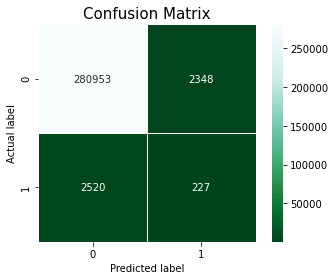

In [14]:
pretty_cm(y_pred, y, [0, 1])

In [24]:
X = X.astype(np.double)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286048 entries, 0 to 286047
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       286048 non-null  float64
 1   1       286048 non-null  float64
 2   2       286048 non-null  float64
 3   3       286048 non-null  float64
 4   4       286048 non-null  float64
 5   5       286048 non-null  float64
 6   6       286048 non-null  float64
 7   7       286048 non-null  float64
 8   8       286048 non-null  float64
 9   9       286048 non-null  float64
dtypes: float64(10)
memory usage: 21.8 MB


In [28]:
scaler = StandardScaler()
X  = scaler.fit_transform(X=X)

In [31]:
if_eif = iso.iForest(X, 
                     ntrees = 100, 
                     sample_size = 256, 
                     ExtensionLevel = 0)

# calculate anomaly scores
anomaly_scores = if_eif.compute_paths(X_in = X)
# sort the scores
anomaly_scores_sorted = np.argsort(anomaly_scores)
# retrieve indices of anomalous observations
indices_with_preds = anomaly_scores_sorted[-int(np.ceil(anomalies_ratio * X.shape[0])):]
# create predictions 
y_pred = np.zeros_like(y)
y_pred[indices_with_preds] = 1

#######################
Evaluation metrics ####
#######################
Accuracy: 0.9825
Precision: 0.0586
Recall: 0.0550
F1: 0.0567


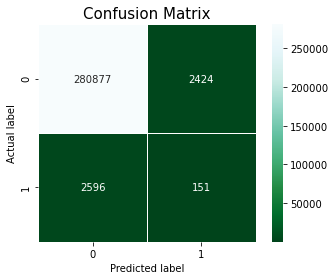

In [32]:

pretty_cm(y_pred, y, [0, 1])

In [34]:
# EIF case

eif = iso.iForest(X, 
                  ntrees = 100, 
                  sample_size = 256, 
                  ExtensionLevel = X.shape[1] - 1)

anomaly_scores = eif.compute_paths(X_in = X)
anomaly_scores_sorted = np.argsort(anomaly_scores)
indices_with_preds = anomaly_scores_sorted[-int(np.ceil(anomalies_ratio * X.shape[0])):]
y_pred = np.zeros_like(y)
y_pred[indices_with_preds] = 1

#######################
Evaluation metrics ####
#######################
Accuracy: 0.9819
Precision: 0.0303
Recall: 0.0284
F1: 0.0293


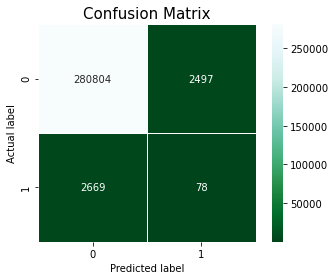

In [35]:
pretty_cm(y_pred, y, [0, 1])